### LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [6]:
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# Viewing the test solution data: 
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [8]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
df.shape

(108414, 4)

In [10]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'[#@\$]', '', text)
    
    tokens = word_tokenize(text)
    
    lemmatizer  = WordNetLemmatizer()
    
    text = [lemmatizer.lemmatize(token) for token in tokens]
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to

[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...

[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df["Despcription_clean"] = df["Description"].apply(preprocessing)

In [13]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...


In [14]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

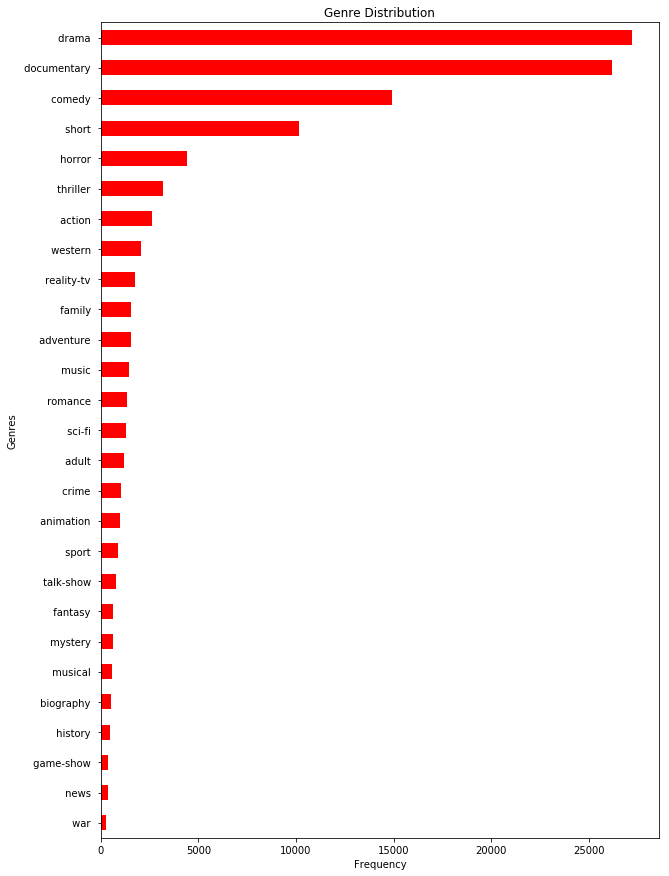

In [15]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "red", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

In [18]:
data = df.drop(["Title","id"] , axis = 1)
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [21]:
data.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,8
4,drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...,8


In [22]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [23]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.6286826424631505

Model Score on Testing data 0.5244156658734112

               precision    recall  f1-score   support



      action        0.05      0.69      0.09        83

       adult        0.02      0.47      0.03        19

   adventure        0.07      0.66      0.12        79

   animation        0.00      0.00      0.00         0

   biography        0.00      0.00      0.00         9

      comedy        0.45      0.53      0.49      6305

       crime        0.00      0.00      0.00         0

 documentary        0.90      0.56      0.69     21073

       drama        0.82      0.46      0.59     24249

      family        0.00      1.00      0.01         2

     fantasy        0.00      0.00      0.00         0

   game-show        0.11      0.95      0.20        22

     history        0.00      0.00      0.00         0

      horror        0.29      0.78      0.42       798

       music        0.07      0.85      0.14        61

     

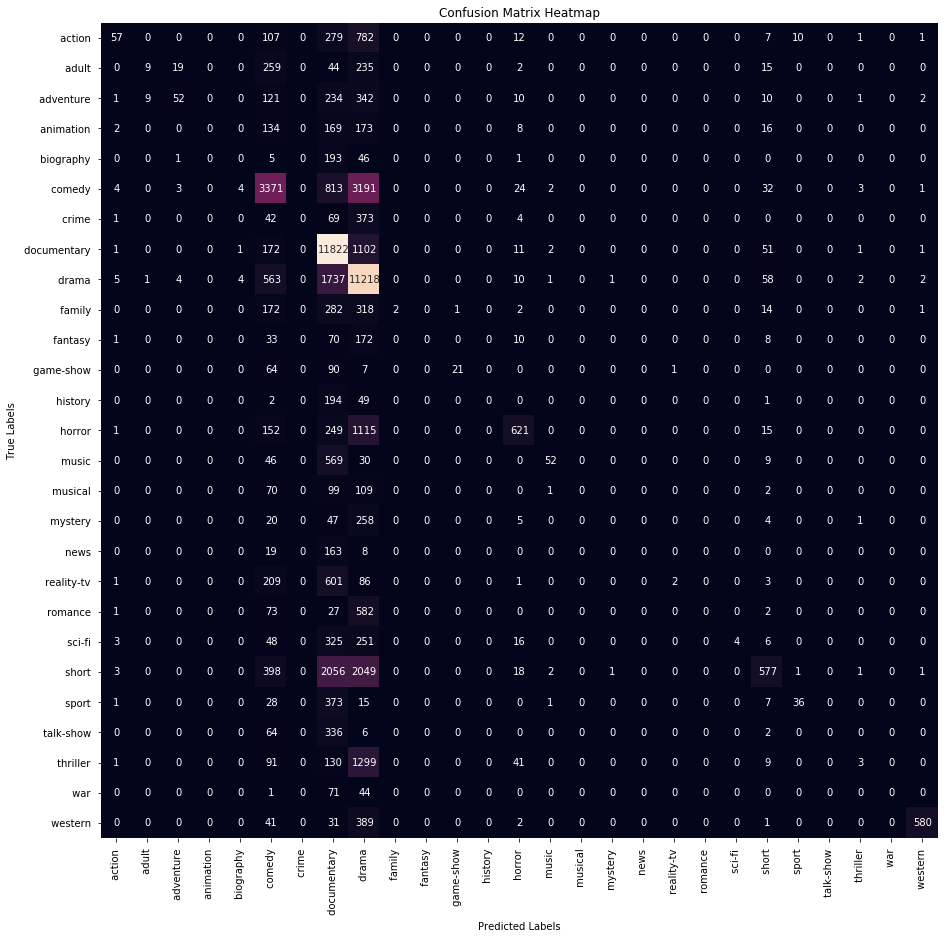

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Testing data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))
 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.9927315660339071

Model Score on Testing data 0.5656096076152527

               precision    recall  f1-score   support



      action        0.36      0.41      0.38      1097

       adult        0.43      0.61      0.50       406

   adventure        0.24      0.44      0.31       426

   animation        0.17      0.38      0.24       231

   biography        0.01      0.07      0.02        44

      comedy        0.58      0.53      0.56      8157

       crime        0.08      0.19      0.12       221

 documentary        0.77      0.70      0.74     14532

       drama        0.67      0.56      0.61     16257

      family        0.17      0.32      0.22       433

     fantasy        0.11      0.23      0.14       135

   game-show        0.66      0.83      0.74       146

     history        0.04      0.15      0.07        72

      horror        0.59      0.61      0.60      2077

       music        0.52      0.59      0.55       612

     

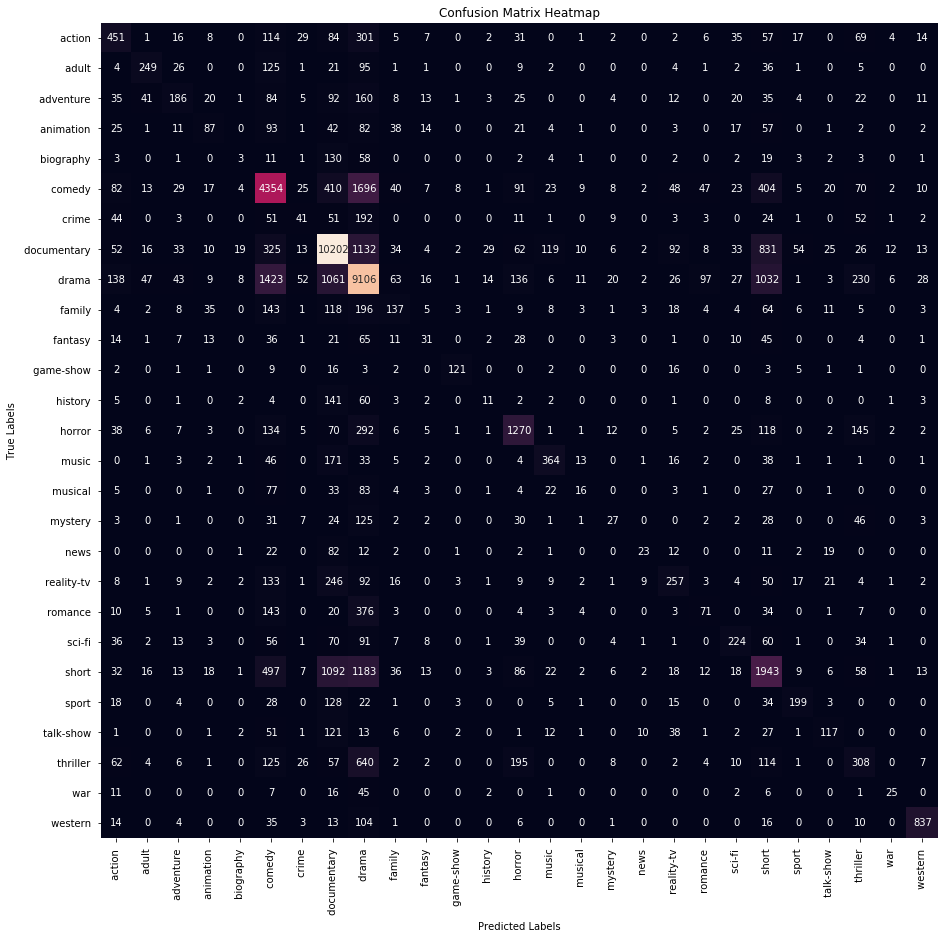

In [26]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### using svc:

Model Score on Training data 0.9994834615455569

Model Score on Testing data 0.5112808308889996

               precision    recall  f1-score   support



      action        0.30      0.32      0.31      1183

       adult        0.41      0.50      0.45       474

   adventure        0.23      0.31      0.26       574

   animation        0.14      0.23      0.17       298

   biography        0.02      0.03      0.02       139

      comedy        0.52      0.49      0.50      7841

       crime        0.08      0.10      0.09       373

 documentary        0.72      0.69      0.70     13759

       drama        0.59      0.54      0.56     14856

      family        0.16      0.21      0.18       592

     fantasy        0.10      0.12      0.11       229

   game-show        0.67      0.68      0.67       180

     history        0.05      0.10      0.07       132

      horror        0.56      0.54      0.55      2231

       music        0.48      0.51      0.50       657

     

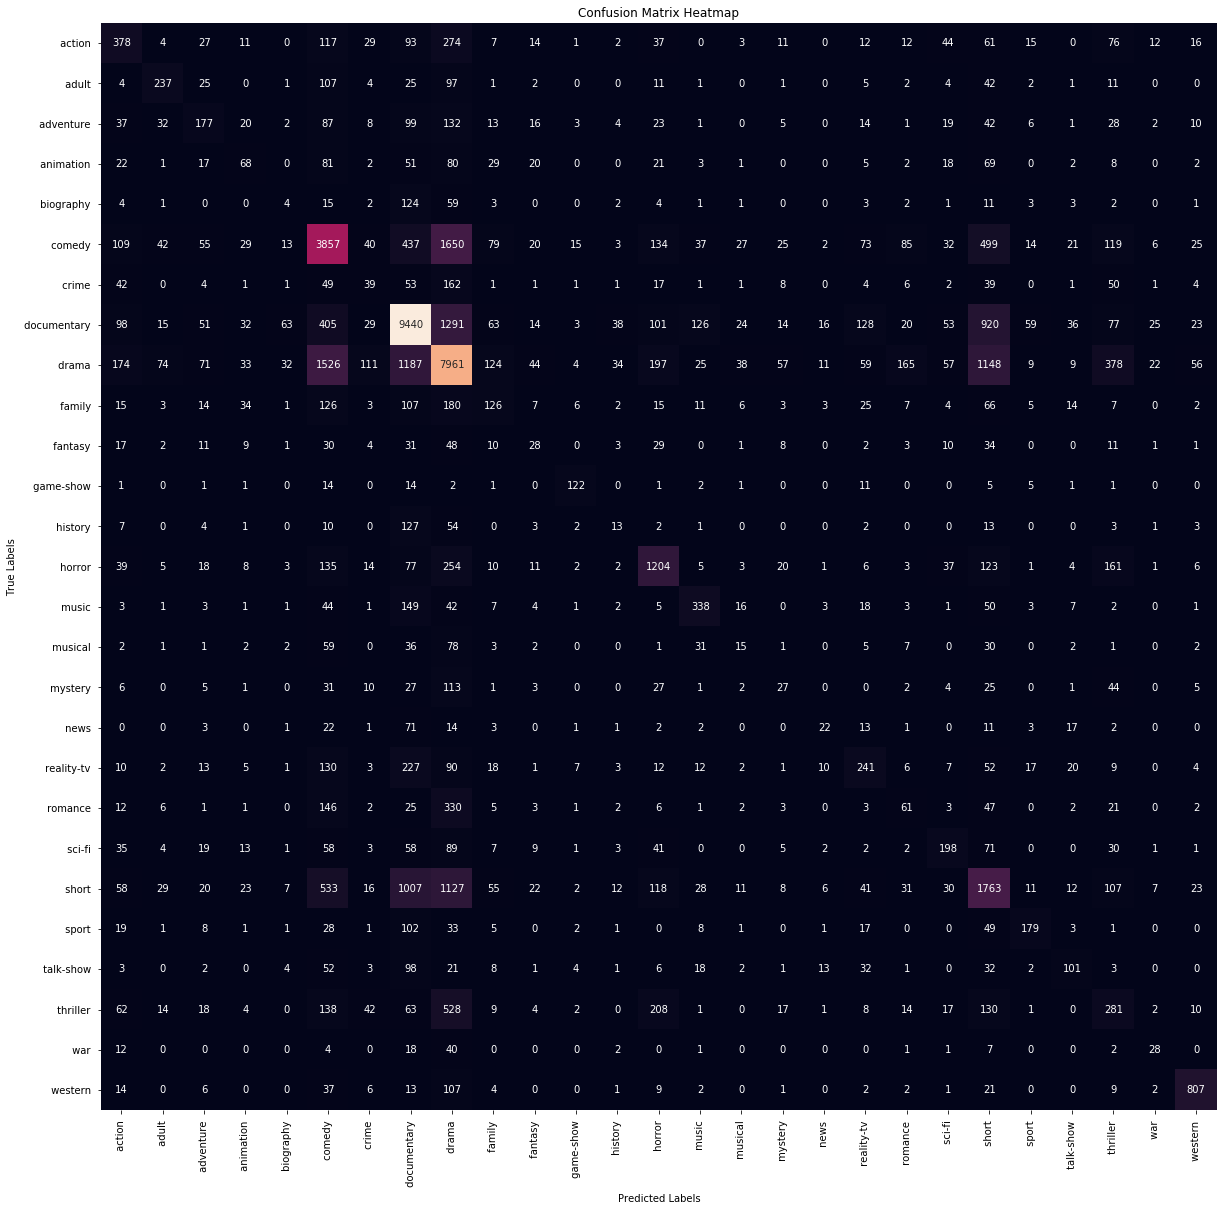

In [27]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### using TfidVectorizer Technique:

In [28]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.6286826424631505

Model Score on Testing data 0.5244156658734112

               precision    recall  f1-score   support



      action        0.05      0.69      0.09        83

       adult        0.02      0.47      0.03        19

   adventure        0.07      0.66      0.12        79

   animation        0.00      0.00      0.00         0

   biography        0.00      0.00      0.00         9

      comedy        0.45      0.53      0.49      6305

       crime        0.00      0.00      0.00         0

 documentary        0.90      0.56      0.69     21073

       drama        0.82      0.46      0.59     24249

      family        0.00      1.00      0.01         2

     fantasy        0.00      0.00      0.00         0

   game-show        0.11      0.95      0.20        22

     history        0.00      0.00      0.00         0

      horror        0.29      0.78      0.42       798

       music        0.07      0.85      0.14        61

     

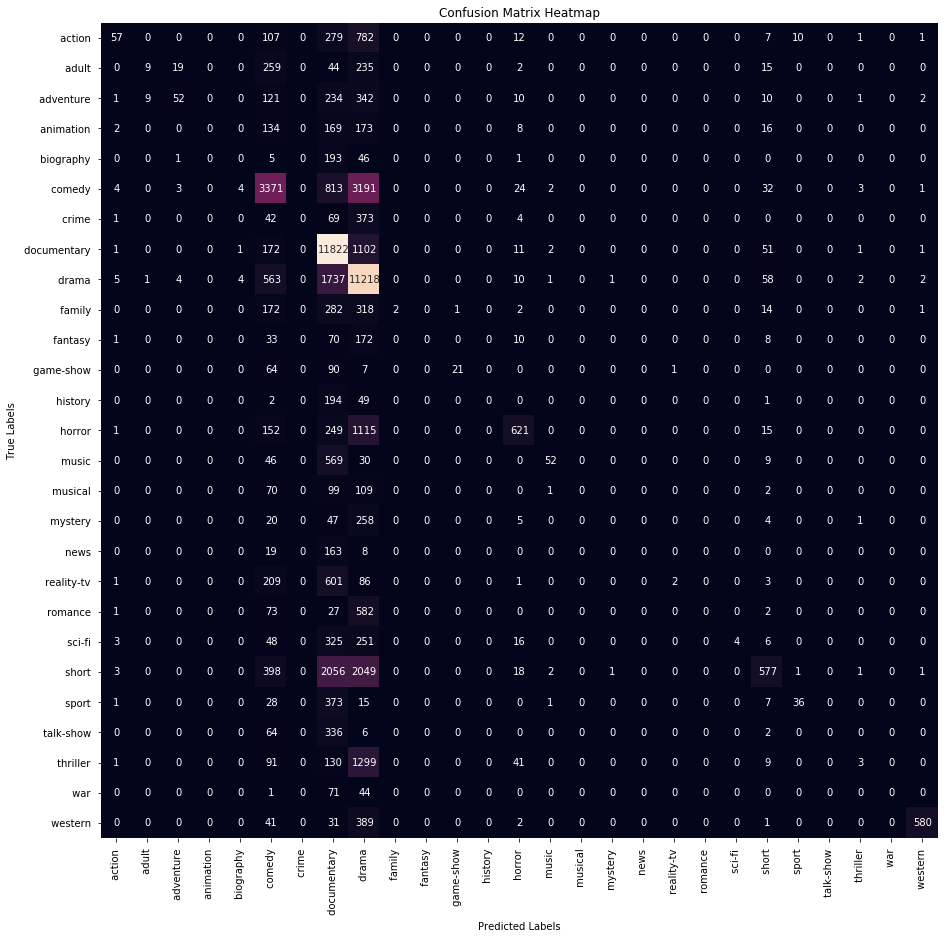

In [29]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Testing data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.9927315660339071

Model Score on Training data 0.5656096076152527

               precision    recall  f1-score   support



      action        0.36      0.41      0.38      1097

       adult        0.43      0.61      0.50       406

   adventure        0.24      0.44      0.31       426

   animation        0.17      0.38      0.24       231

   biography        0.01      0.07      0.02        44

      comedy        0.58      0.53      0.56      8157

       crime        0.08      0.19      0.12       221

 documentary        0.77      0.70      0.74     14532

       drama        0.67      0.56      0.61     16257

      family        0.17      0.32      0.22       433

     fantasy        0.11      0.23      0.14       135

   game-show        0.66      0.83      0.74       146

     history        0.04      0.15      0.07        72

      horror        0.59      0.61      0.60      2077

       music        0.52      0.59      0.55       612

    

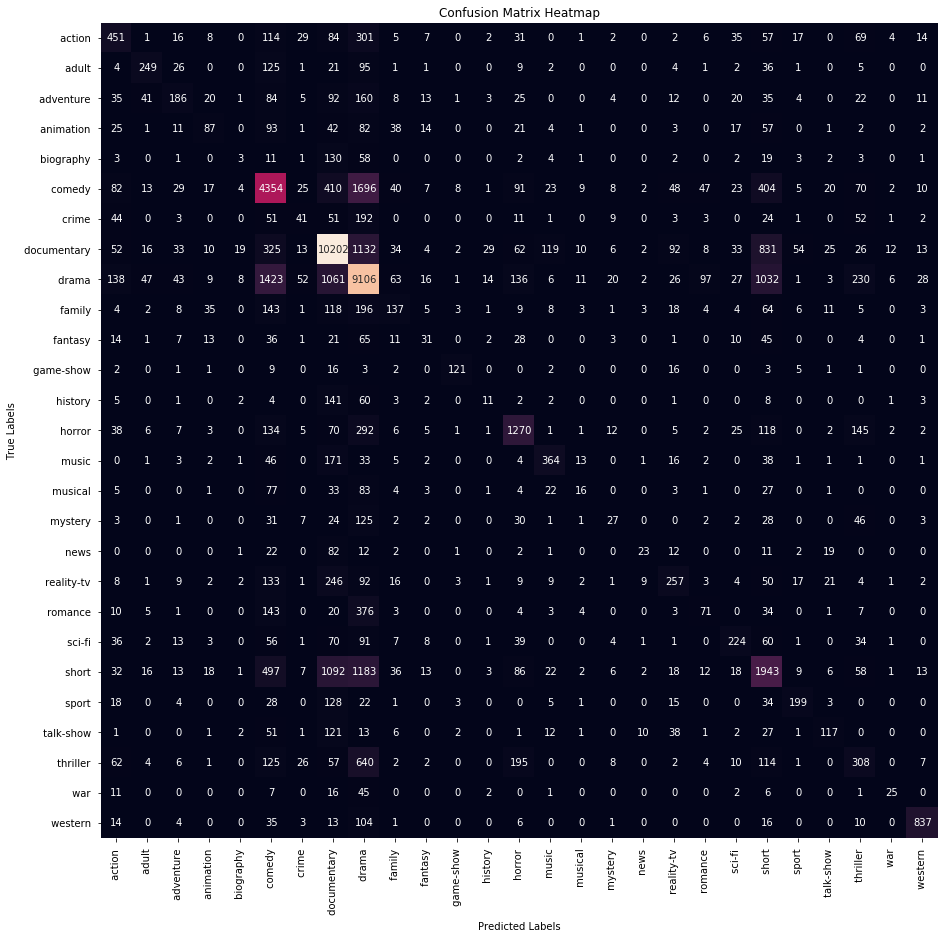

In [30]:
# Again Using Logistic regression for this
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Training data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()